# NLP Analysis

We will use NLTK to:

- Tokenize the text
- Remove stopwords

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Applying-NLP-Text-Manipulations" data-toc-modified-id="Applying-NLP-Text-Manipulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Applying NLP Text Manipulations</a></span></li><li><span><a href="#Answering-Data-Questions" data-toc-modified-id="Answering-Data-Questions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Answering Data Questions</a></span></li><li><span><a href="#Write-a-function-for-the-whole-pipeline" data-toc-modified-id="Write-a-function-for-the-whole-pipeline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Write a function for the whole pipeline</a></span></li></ul></div>

Import all the needed libraries first

In [1]:
# Import libraries
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os import path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## Applying NLP Text Manipulations

Import the text that we scrapped in Webscrapping.ipynb

In [2]:
# Read the text source file
# filepath = os.path.join(os.getcwd(), "scrapped", "mobydick.txt")
filepath = os.path.join(os.getcwd(), "scrapped", "pride_and_prejudice.txt")

with open(filepath, "r", encoding="utf8") as file:
    text = file.read()

# print(text)

Use regular expression to extract all words in the Moby Dick text

In [3]:
# Extract all words in text as tokens
tokens = re.findall("\w+", text)

We can use `RegexpTokenizer()` from `nltk.tokenize` for a better approach

In [4]:
# Create a RegexTokenizer for alphanumeric words only
tokenizer = RegexpTokenizer("\w+")

# Create tokens from the text
tokens = tokenizer.tokenize(text)

print(len(tokens))
# print(tokens)

126215


We should normalize the text all to lowercases

In [5]:
# Convert tokens to lowercase
tokens = [token.lower() for token in tokens]

print(len(tokens))
# print(tokens)

126215


There are a lot of common words (stopwords) that are not really interesting in this text. We should remove them from our text to analyze

In [6]:
# Select our stopwords
sw = stopwords.words("english")

# Exclude stopwords from our list of tokens
tokens = [token for token in tokens if token not in sw]

print(len(tokens))
# print(tokens)

57139


## Answering Data Questions

- What are the most frequent words in *Moby Dick*?
- How often do those words occur?

We can now answer our original data questions

In [7]:
# Set visualization style to seaborn
sns.set()

In [8]:
# Create a frequency distribution 
freq_dist = FreqDist(tokens)
#display(freq_dist)

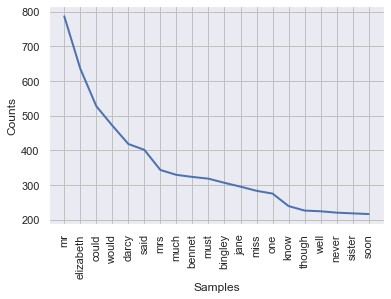

In [9]:
# Create a plot of the frequency distribution: top 50
freq_dist.plot(20);

What if we add more stopwords, e.g. from scikit-learn?

In [10]:
# Add ENGLISH_STOP_WORDS to our current list of stopwords
sw = set(list(sw) + list(ENGLISH_STOP_WORDS))

# Exclude stopwords from our list of tokens
tokens = [token for token in tokens if token not in sw]

print(len(tokens))
# print(tokens)

48116


Let's see what the resulting frequency distribution looks like

In [11]:
# Create a frequency distribution 
freq_dist = FreqDist(tokens)
#display(freq_dist)

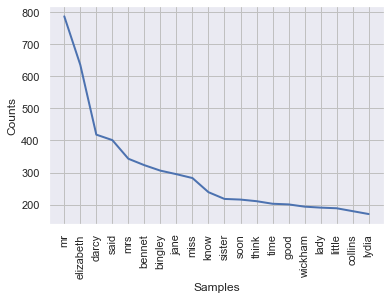

In [12]:
# Create a plot of the frequency distribution: top 50
freq_dist.plot(20);

## Write a function for the whole pipeline

In [14]:
def plot_word_freq(url):
    """Takes a url from Project Gutenberg and plot word frequency distribution of the text contents."""
    
    # Import libraries
    import os
    import re
    import requests as req
    from bs4 import BeautifulSoup
    from os import path
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    from nltk import FreqDist
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    
    # Make GET request
    res = req.get(url)
    
    # Extract HTML
    html = res.text
    
    # Create a BeautifulSoup object
    soup = BeautifulSoup(html)
    
    # Access the text of the page for the novel
    text = soup.get_text()
    
    # Create a RegexTokenizer for alphanumeric words only
    tokenizer = RegexpTokenizer("\w+")

    # Create tokens from the text
    tokens = tokenizer.tokenize(text)
    
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Select our stopwords
    sw = stopwords.words("english")
    
    # Add ENGLISH_STOP_WORDS to our current list of stopwords
    sw = set(list(sw) + list(ENGLISH_STOP_WORDS))

    # Exclude stopwords from our list of tokens
    tokens = [token for token in tokens if token not in sw]
    
    # Create a frequency distribution 
    freq_dist = FreqDist(tokens)
    
    # Set visualization style to seaborn
    sns.set()
    
    # Create a plot of the frequency distribution: top 50
    freq_dist.plot(20);

Now, let's test this function with some urls

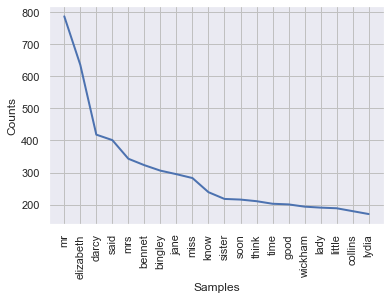

In [15]:
# Pride and Prejudice
plot_word_freq("https://www.gutenberg.org/files/1342/1342-h/1342-h.htm")

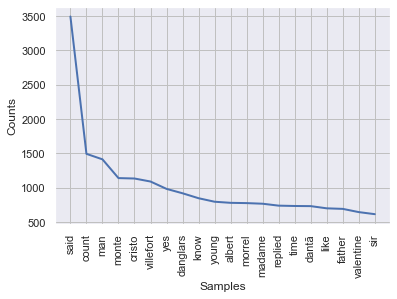

In [16]:
# The Count of Monte-Cristo
plot_word_freq("https://www.gutenberg.org/files/1184/1184-h/1184-h.htm")

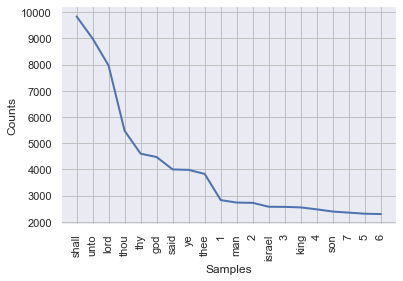

In [17]:
# The King James Bible
plot_word_freq("https://www.gutenberg.org/files/10/10-h/10-h.htm")